In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastdata = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastdata

('2017-08-23')

In [11]:
# Calculate the date 1 year ago from the last data point in the database
dates1year = dt.date(2017,8,23) - dt.timedelta(days=365)
dates1year

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= dates1year).order_by(Measurement.date).all()
precipitation_scores

 0.01),
 ('2016-09-10', 0.14),
 ('2016-09-10', 0.09),
 ('2016-09-10', 1.16),
 ('2016-09-11', 0.05),
 ('2016-09-11', 0.18),
 ('2016-09-11', 0.12),
 ('2016-09-11', 0.3),
 ('2016-09-11', 0.6),
 ('2016-09-12', 0.0),
 ('2016-09-12', 0.04),
 ('2016-09-12', None),
 ('2016-09-12', None),
 ('2016-09-12', 0.15),
 ('2016-09-12', 0.31),
 ('2016-09-12', 1.04),
 ('2016-09-13', 0.02),
 ('2016-09-13', 0.37),
 ('2016-09-13', 0.32),
 ('2016-09-13', None),
 ('2016-09-13', 0.46),
 ('2016-09-13', 0.34),
 ('2016-09-13', 1.2),
 ('2016-09-14', 1.32),
 ('2016-09-14', 0.9),
 ('2016-09-14', 1.84),
 ('2016-09-14', None),
 ('2016-09-14', 1.19),
 ('2016-09-14', 2.33),
 ('2016-09-14', 6.7),
 ('2016-09-15', 0.42),
 ('2016-09-15', 0.12),
 ('2016-09-15', 0.07),
 ('2016-09-15', None),
 ('2016-09-15', 0.17),
 ('2016-09-15', 0.83),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.07),
 ('2016-09-16', 0.0),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.61),
 ('2016-09

In [13]:
savequery = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()
pd.DataFrame(savequery,columns=['Dates','Precipitations'])

,Dates,Precipitations
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
19545,2010-01-01,0.21
19546,2010-01-01,0.15
19547,2010-01-01,0.15
19548,2010-01-01,0.05


In [14]:
Dataframe_query = pd.DataFrame(savequery, columns=['Date', 'Precipitation'])
Dataframe_query.set_index('Date', inplace=True)
Dataframe_query.head(15)

,Precipitation
Date,
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45
2017-08-22,0.00
2017-08-22,0.00
2017-08-22,0.50
2017-08-21,0.00
2017-08-21,0.02


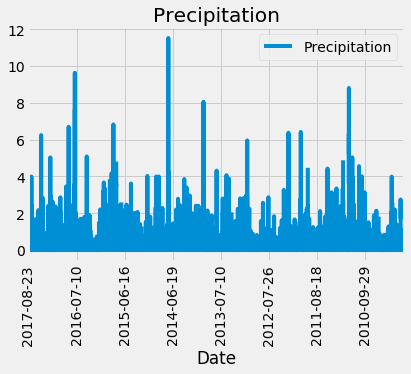

<Figure size 720x360 with 0 Axes>

In [15]:
#plotting 
Dataframe_query.plot()
plt.title('Precipitation')
plt.xticks(rotation = '90')
plt.figure(figsize= (10,5))
plt.savefig('Precipitation')

In [16]:
Dataframe_query.describe()

,Precipitation
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


In [17]:
# Station Analysis
# Design a query to show how many stations are available in this dataset?
total_station = session.query(Measurement.station).distinct().count()
total_station
print(f'There are {total_station} stations')

There are 9 stations


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
pd.DataFrame(most_active, columns=['Most Active', 'Most rows'])

,Most Active,Most rows
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id = [func.min(Measurement.tobs),func.max(Measurement.tobs), func.avg(Measurement.tobs)]
result = session.query(*station_id).filter(Measurement.station== 'USC00519281').all()
result

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram 
most_active_12 = session.query(Measurement.tobs).filter(Measurement.date >= dates1year).filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()
most_active_12 = pd.DataFrame(most_active_12, columns=['TOBS'])
most_active_12

,TOBS
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


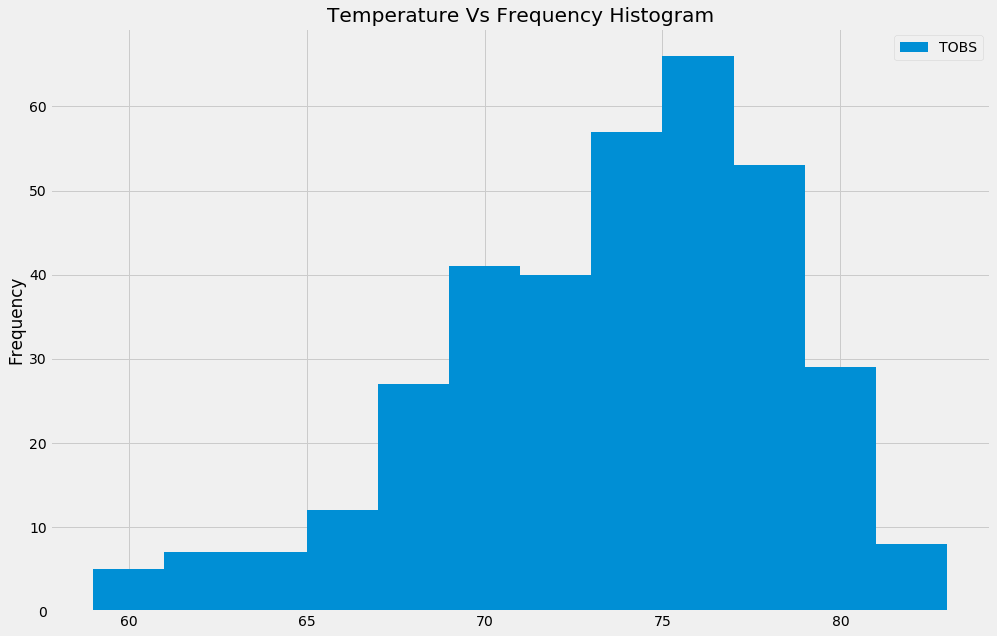

In [21]:
#plotting
most_active_12.plot.hist(bins=12, title = 'Temperature Vs Frequency Histogram',figsize =(15,10))
plt.savefig('temp_vs_frequency')

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
caltemps = calc_temps("2017-03-14", "2017-04-28")
caltemps

[(65.0, 73.89583333333333, 83.0)]

In [24]:
caltemps_df = pd.DataFrame(caltemps, columns=["TMIN","TAVG","TMAX"])
caltemps_df

,TMIN,TAVG,TMAX
0,65.0,73.895833,83.0


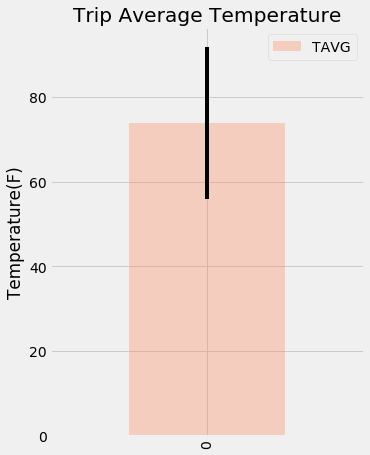

In [25]:
caltemps_df.plot.bar(y="TAVG", yerr=(caltemps_df["TMAX"] - caltemps_df["TMIN"]), title="Trip Average Temperature",color="Coral", alpha= 0.30, figsize=(5,7))
plt.ylabel("Temperature(F)")
plt.savefig("Trip_avg_temp")


In [26]:
# Optional Bonus

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")


[(62.0, 69.15384615384616, 77.0)]

In [27]:
start_date = daily_normals("01-01"),daily_normals("02-01"),daily_normals("03-01"),daily_normals("04-01"),daily_normals("05-01"),daily_normals("06-01"),daily_normals("07-01"),daily_normals("08-01"),daily_normals("09-01"),daily_normals("10-01")
list_date =list(start_date)
list_date

[[(62.0, 69.15384615384616, 77.0)],
 [(56.0, 68.14035087719299, 78.0)],
 [(64.0, 70.0327868852459, 76.0)],
 [(60.0, 71.87931034482759, 80.0)],
 [(65.0, 72.75925925925925, 79.0)],
 [(64.0, 74.6140350877193, 81.0)],
 [(67.0, 74.77777777777777, 81.0)],
 [(67.0, 75.54, 83.0)],
 [(69.0, 77.0, 82.0)],
 [(69.0, 75.22916666666667, 80.0)]]

In [38]:
new_list = [[62.0, 69.15384615384616, 77.0],[56.0, 68.14035087719299, 78.0],[64.0, 70.0327868852459, 76.0],
[60.0, 71.87931034482759, 80.0],[65.0, 72.75925925925925,79.0],[64.0, 74.6140350877193, 81.0],[67.0, 74.77777777777777, 81.0],[67.0, 75.54, 83.0],[69.0, 77.0,82.0],[69.0, 75.22916666666667, 80.0]]
new_list = pd.DataFrame(new_list, columns=['TMIN','TAVG','TMAX'])
new_list2 = new_list.insert(0,"Date", ["01-01", "02-01", "03-01", "04-01", "05-01", "06-01", "07-01", "08-01", "09-01", "10-01"], True)
new_list.set_index('Date')

,TMIN,TAVG,TMAX
Date,,,
01-01,62.0,69.153846,77.0
02-01,56.0,68.140351,78.0
03-01,64.0,70.032787,76.0
04-01,60.0,71.879310,80.0
05-01,65.0,72.759259,79.0
06-01,64.0,74.614035,81.0
07-01,67.0,74.777778,81.0
08-01,67.0,75.540000,83.0
09-01,69.0,77.000000,82.0


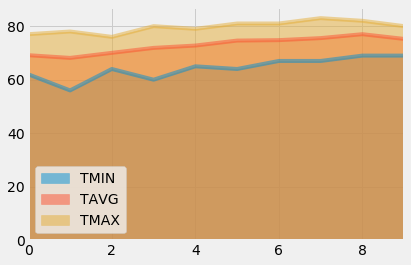

In [53]:
labels = ['TMIN','TAVG','TMAX']
new_list.plot(kind='area', stacked=False)